In [1]:
import seabreeze
seabreeze.use('pyseabreeze')
from seabreeze.spectrometers import list_devices, Spectrometer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import savetxt
from scipy import interpolate
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

In [11]:
spec = Spectrometer.from_first_available()

In [12]:
spec.integration_time_micros(1500000) # Manually select an integration time (trial and error)

In [13]:
def scan_to_average(scans):
    intensities = []
    for i in np.arange(scans+1):
        intensities.append(spec.intensities())
        
        return intensities
    
scans = 1000
    
spectra = np.mean(scan_to_average(scans), axis = 0)[50::5]

In [14]:
wavelengths = spec.wavelengths()[50::5]

In [15]:
spec.close()

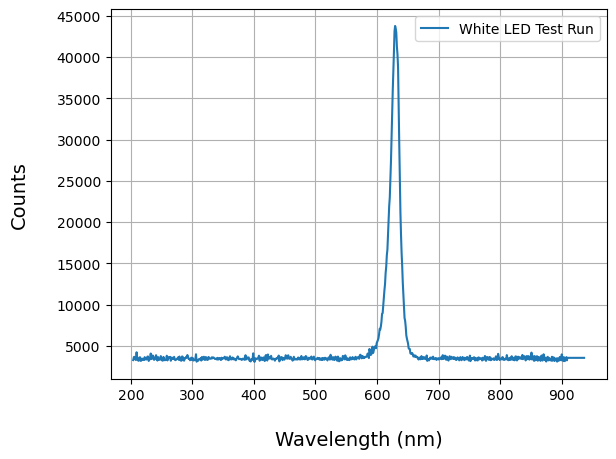

In [30]:
plt.plot(wavelengths, spectra, label = 'RED LED')
plt.grid()
plt.ylabel('Counts\n', fontsize = 14)
plt.xlabel('\nWavelength (nm)', fontsize = 14)
plt.legend()
plt.show()

In [48]:
new_spectra = np.interp(np.arange(400, 701, 5), wavelengths, spectra)
resampled = np.column_stack((np.arange(400, 701, 5), new_spectra))
wl, rad = resampled[:,0], resampled[:, 1]/np.amax(resampled[:, 1])

df = pd.DataFrame({"wavelength": wl, "radiance": rad})
df.to_csv("LED.csv", index = False)

In [44]:
wl[np.argmax(rad)]

630.0